In [2]:
import numpy as np; import pandas as pd
import xarray as xr; import matplotlib.pyplot as plt;

Dentro de loader hay muchas funciones y clases diferentes. Para empezar, creamos a crear un objeto de observaciones. Esto va a actuar como interface entre los datos y otras funciones.

In [102]:
    
"""
En esta clase vamos a incluir herramientas para cargar funciones, metodos, filepaths, formatos, etc. Para generar objetos de observaciones. 

Circulo: (centro) el modulo que contiene el acceso a la informacion. 
En el (1er anillo) del perimetro hay diferentes interfaces que configuran el acceso de otras funciones a los datos mismos. En el anillo de afuera hay funciones especificas de proyectos donde queremos generar y graficar los resultados.  

"""


class assemble:
    
        def __init__(self, obj_id, paths ):
            self.name = obj_id['name'];
            self.type = obj_id['type'];
            self.project = obj_id['project']; 
            self.limits = obj_id['limits'];
            self.files = paths; 
            
            # Now list properties that will be generated by class methods.
            self.grids = dict(); # they will be pandas, numpy, and xarray objects.
            self.vars = dict(); 
            
        def retrieve(self,filename, fileformat):
            
            if fileformat == 'netcdf':
                dataset = xr.open_dataset(filename);
            elif fileformat == 'mat':
                dataset = sio.loadmat(filename);

            return dataset
            
        def cyclethru(self):
            filelist = self.files.copy();
            print( [self.files[kk]  for kk in range(len(filelist))] );
            
        def storevar(self,filename,varname,limits='none'):
            # This method will:
            # 1. Load dataset from "file"
            dataset = self.retrieve(filename,'netcdf');
            
            # 2. Extract variable grid from "varname" in that dataset. 
            myvar = dataset[varname];
            #        If cut=True, load only a slice into memory 
            if isinstance(limits, dict):
                if limits['t0'] != 'none':
                    myvar = myvar.sel(time=slice(limits['t0'],limits['t1']));
                
            # 3. Store variable grid inside of self.grids.
            self.grids[varname] = myvar;

            
        def gridtime(self, varname):
            gridobj = self.grids[varname];
            
            
        def printgrid(self,varname, axobj, axind, cut=False):
            mygrids = self.grids[varname[kk]];                                                                                                                                                                         
            
            # Put all in the same figure axis
            axobj[axind].pcolormesh(  )
            

In [128]:
limits_1 = {'t0':'2019-02-01','t1':'2019-02-07','lon':[134.7],'lat':[12.3]};
obj_1 = {'name':'SIO1','type': 'MOORING','project':'PISTON','limits':limits1};


adcpfolder = '/media/mydrive/PISTON/Moorings/SIO1/ADCP/'
filenames_1 = ['SIO1_3160.nc','SIO1_4021.nc','SIO1_11181.nc'];
files_1 = [adcpfolder + filenames_1[kk] for kk in range(len(filenames_1))]

In [129]:
# Esta celula muestra un ejemplo especifico
SIO1 = assemble(obj_1, files_1)
vars2plot = ['u'];

In [130]:
SIO1.storevar(files_1[0],'u',limits_1)


# Import 
import sys
sys.path.append('/media/mydrive/PhysOc/DataFinder/')
import PISTON_Data;
old_SIO1 = PISTON_Data.Mooring('SIO1');
T2plot = old_SIO1.uvT['T'].sel(time=slice(limits_1['t0'],limits['t1']));

(180.0, 50.0)

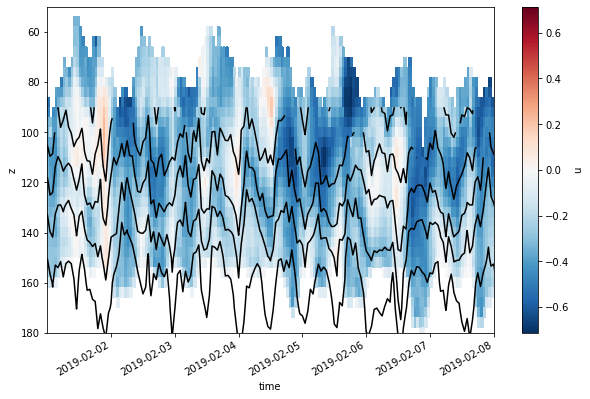

In [134]:

SIO1.grids['u'].plot(figsize=[10,6])
plt.contour( pd.to_datetime(T2plot.time.values), T2plot.depth, T2plot.values, levels=[19,21,23,25,27],colors='black' )

plt.ylim((180,50))

In [132]:
T2plot

<xarray.DataArray 'T' (depth: 80, time: 5953)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * depth    (depth) uint16 10 20 30 40 50 60 ... 1050 1080 1110 1140 1170 1200
  * time     (time) datetime64[ns] 2019-02-01 2019-02-01T01:00:00 ... 2019-10-07

In [99]:
adcp1 = SIO1.retrieve(files_1[0],'netcdf')

In [100]:
SIO1.cyclethru()

['/media/mydrive/PISTON/Moorings/SIO1/ADCP/SIO1_3160.nc', '/media/mydrive/PISTON/Moorings/SIO1/ADCP/SIO1_4021.nc', '/media/mydrive/PISTON/Moorings/SIO1/ADCP/SIO1_11181.nc']


In [95]:
isinstance({'f':3,'x':1},dict)

True